# NTDS assignment 2: network models
[Hermina Petric Maretic](https://people.epfl.ch/hermina.petricmaretic), *PhD student*, [EPFL](http://epfl.ch) [LTS4](http://lts4.epfl.ch)

For this assignment we will work on a network representing the collaboration between scientists in the field of General Relativity and Quantum Cosmology. The network comes from [SNAP](http://snap.stanford.edu/data/ca-GrQc.html) and is described as follows:

> Arxiv GR-QC (General Relativity and Quantum Cosmology) collaboration network is from the e-print [arXiv](https://arxiv.org) and covers scientific collaborations between authors papers submitted to General Relativity and Quantum Cosmology category. If an author *i* co-authored a paper with author *j*, the graph contains a undirected edge from *i* to *j*. If the paper is co-authored by *k* authors this generates a completely connected (sub)graph on *k* nodes. The data covers papers in the period from January 1993 to April 2003 (124 months). It begins within a few months of the inception of the arXiv.

In [63]:
%matplotlib inline

import os
import random
import math
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [64]:
G = nx.read_edgelist(os.path.join('..', 'data', 'arxiv_collaboration_network.txt'))

In [65]:
print('My network has {} nodes.'.format(len(G.nodes())))
print('My network has {} edges.'.format(G.size()))

My network has 5242 nodes.
My network has 14496 edges.


## 1. Comparing to model networks

1.1 In this part of the assignment, you have to create an Erdős–Rényi and Barabási-Albert graph using NetworkX, and compare them to the collaboration network. Try to simulate the original network as best as you can. When choosing parameters for the networks, take into account the number of vertices and edges of the original network. The number of vertices should be exactly the same. Comment on your choice of parameters.

In [66]:
def plot_degree(net, title):
    deg = net.degree().values()
    plt.hist(list(deg))
    plt.title(title)
    plt.ylabel("Number of vertices")
    plt.xlabel("Degree")
    plt.show()

In [67]:
# Erdős–Rényi Graph
N = len(G.nodes())
p_er = 2 * G.size() / (N * (N - 1))
er = nx.erdos_renyi_graph(N, p_er)

# Barabási-Albert Graph
m = 3
ba = nx.barabasi_albert_graph(N, m)


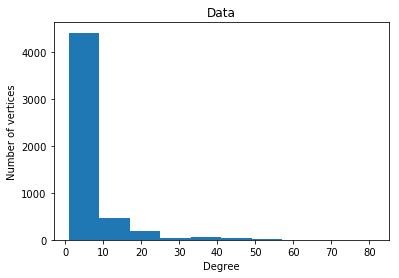

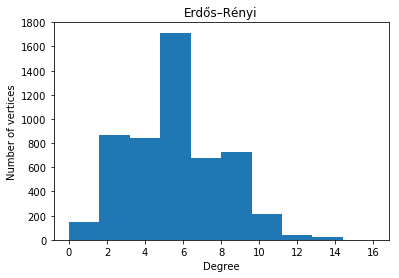

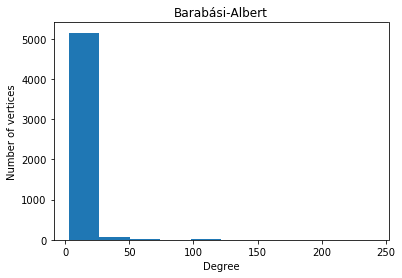

In [68]:
# Plot for comparison
plot_degree(G, 'Data')
plot_degree(er, 'Erdős–Rényi')
plot_degree(ba, 'Barabási-Albert')

**Your answer here.**
While considering the Erdős–Rényi model, we can explicitly compute the *linking* propbability as $p = \frac{2L}{N\left(N - 1\right)}$ in order to have network as close as the original (*i.e. in term of vertices/edges*).
For the Barabási-Albert model, there is no explicit formulation, therefore one can try to find a number that generate a network close to the original. The value $m = 3$ shows satisfactory results in the experiment.

In [69]:
print('My Erdős–Rényi network has {} nodes.'.format(len(er.nodes())))
print('My Erdős–Rényi network has {} edges.'.format(er.size()))
print('My Barabási-Albert network has {} nodes.'.format(len(ba.nodes())))
print('My Barabási-Albert network has {} edges.'.format(ba.size()))

My Erdős–Rényi network has 5242 nodes.
My Erdős–Rényi network has 14459 edges.
My Barabási-Albert network has 5242 nodes.
My Barabási-Albert network has 15717 edges.


1.2 Check the size of the largest connected component in each graph and compare them to the original network. In the Erdős–Rényi model, what should the probability of creating each edge be in order to have the same expected size of the largest component? Justify. Generate a graph with this parameter to check if you indeed get a similar value.

In [70]:
giant_G = max(nx.connected_component_subgraphs(G), key=len)
giant_er = max(nx.connected_component_subgraphs(er), key=len)
giant_ba = max(nx.connected_component_subgraphs(ba), key=len)
print(len(giant_G.nodes()))
print(len(giant_er.nodes()))
print(len(giant_ba.nodes()))

4158
5218
5242


**Your answer here.**

Erdős–Rényi network should be in the connected regime in order to have all nodes connected to the giant component. Therefore the probability of connecting an edge is given by:
$$ p_{giant} = \frac{\ln{N}}{N}$$

In [71]:
# Your code here.
Ng = len(giant_G.nodes())
p_giant = math.log(N) / (4.5*N)
print('The parameter p for an Erdős–Rényi network with the same expected size of the giant component is {}.'.format(p_giant))

# Your code here.
er_giant = nx.erdos_renyi_graph(N, p_giant)
print('The size of the component in a randomly generated network with this parameter is {}.'.format(len(er_giant.nodes())))

gc = len(max(nx.connected_component_subgraphs(er_giant), key=len).nodes())
print(gc)

The parameter p for an Erdős–Rényi network with the same expected size of the giant component is 0.00036307000652352164.
The size of the component in a randomly generated network with this parameter is 5242.
4078


1.3 Look at the clustering coefficient of the original network. Is there a network model we talked about that could have a clustering coefficient that is close? Explain.

In [72]:
nx.average_clustering(G)

0.529635811052136

In [87]:
Cer = p_er * (N - 1) / N
Cba = (m/4) * (math.log(N) ** 2 / N)
print ('Clustering coefficient for Erdős–Rényi model {}'.format(Cer))
print ('Clustering coefficient for Barabási-Albert model {}'.format(Cba))

Clustering coefficient for Erdős–Rényi model 0.001055076968359773
Clustering coefficient for Barabási-Albert model 0.010494555619410983


**Your answer here.**

$$\langle C_{er} \rangle = \frac{\langle k \rangle}{N} = \frac{p \left(N - 1\right)}{N} $$
$$\langle C_{ba} \rangle = \frac{m}{4}\frac{ln\left(N\right)^2}{N} $$


## 2. Creating a network with a predefined degree distribution

In this part of the assignment, you will have to create a random network from a predefined degree distribution. There are several network models which can create a random network with the exact same degree distribution as the original, or with the same expected distribution as the original. Refer to section 4.8 of [the Barabási book](http://networksciencebook.com) for more information.

One of the most famous ones is the configuration model. The model for a graph with $L$ edges in total is constructed in the following steps:

- Assign a degree to each node, represented as stubs (half-links). The degree sequence is either generated analytically from a preselected distribution, or it is extracted from the adjacency matrix of a real network. Note that we must start from an even number of stubs to avoid being left with unpaired stubs.
- Randomly select a stub pair and connect them. Then randomly choose another pair from the remaining $2L - 2$ stubs and connect them. This procedure is repeated until all stubs are paired up.

*Reminder:* A stub is a half-link, representing the half of an edge. It contains one node and can be paired up with another stub to create an edge (between the two corresponding nodes).

2.1 However, this model allows for the creation of multi-links (multiple edges between the same pair of vertices) and self-loops, thus leading to a non-simple graph. In this assignment, you will implement a greedy configuration model, to avoid these problems.

The algorithm goes as follows:
- Extract the degree sequence from our collaboration network.
- Assign a target degree to each node, represented as stubs or half-links. Use the degree sequence extracted from the collaboration network.
- Sort the nodes by degree. 
    - Pick the node with the highest target degree. Delete all its stubs from the list of stubs to make sure we don't create a self loop.
    - Until all its weighted degree equals its target degree: 
        - Randomly select one stub from the list of stubs (corresponding to one of the other nodes), and connect these two nodes. In case the two chosen nodes are already connected, simply increase the weight of this edge by one. Be careful to randomly select from stubs and not from nodes, as this means the chances of selecting a node will be proportional to its target degree.
    - When the number of edges adjacent to this node corresponds to its target degree, go on to the second node in the list. 
    - Repeate this procedure until all stubs are paired up, or there is only one node left with a pair number of stubs. In that case, don't create a self-loop, but discard the stubs.
    
*Hints*: 
 - Use `nx.empty_graph()` to create an empty graph.
 - Use `G.add_edge(node1,node2,weight = 1)` to add an edge to a weighted graph.
 - Use `G.edge[node1][node2]['weight'] += 1` to increment the weight of an edge by one.

In [80]:
class Stub:
    node_degree = -1
    node_id = -1
    target_node_id = -1

    def __init__(self, id, degree):
        """
        Constructor for one stubs
        :param id:      Id of the corresponding node
        :param degree:  Targeted degree
        """
        self.node_id = id
        self.node_degree = degree
        self.target_node_id = -1
        
def greedy_configuration(degree_distribution):
    # Init stubs
    stubs = []
    for i, deg in enumerate(degree_distribution):
        for k in range(0, deg):
            stubs.append(Stub(i, deg))
    # Init graph
    G = nx.empty_graph()
    #  Index in the stub list from where to select second half of the edges
    stub_idx = 0
    #  List of valid stub index (considered as valid of not already selected/ under construction)
    valid_idx = list(range(0, len(stubs)))
    # Iterate over all node
    for deg in degree_distribution:
        # Is there still some stubs left ?
        if len(valid_idx) != 0:
            # Remove index corresponding to this node in order ot not have self loop
            for n in range(stub_idx, stub_idx + stubs[stub_idx].node_degree):
                if n in valid_idx:
                    valid_idx.remove(n)
            # Start sampling
            for k in range(deg):
                # Check if stub is already assigned
                if stubs[stub_idx + k].target_node_id == -1:
                    # Find unused stubs
                    while True:
                        #i_stub = random.randint(stub_idx + stubs[stub_idx].node_degree, len(stubs) - 1)
                        i_stub = random.choice(valid_idx)
                        if stubs[i_stub].target_node_id == -1:
                            break
                    # Remove index from valid_idx in order to no select it again
                    valid_idx.remove(i_stub)
                    # Assign edge between the two stubs
                    stubs[stub_idx + k].target_node_id = stubs[i_stub].node_id
                    stubs[i_stub].target_node_id = stubs[stub_idx + k].node_id
                    # Update network
                    node1 = stubs[stub_idx + k].node_id
                    node2 = stubs[i_stub].node_id
                    if G.has_edge(node1, node2):
                        G[node1][node2]['weight'] += 1
                    else:
                        assert node1 != node2
                        G.add_edge(node1, node2, weight=1)
                    if len(valid_idx) == 0:
                        break
                else:
                    a = 0
            # Move to the next node
            stub_idx += stubs[stub_idx].node_degree
    return G

In [81]:
degree_distribution=sorted(nx.degree(G).values(),reverse=True) # degree distribution sorted from highest to lowest
gc = greedy_configuration(degree_distribution)

2.2 Verify that the networks have the same number of nodes. Plot the difference between the weighted degree distributions to verify that they are identical. If not, why?

Cumulated degree differences 0


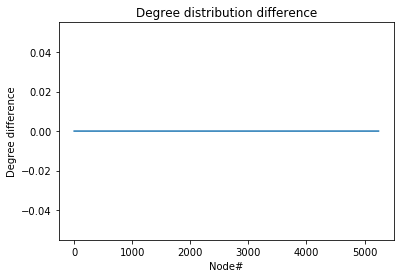

In [83]:
degree_sequence_gc=sorted(nx.degree(gc, weight = 'weight').values(),reverse=True) #weighted degree distribution
# Your code here.
acc_diff_deg = 0
diff_deg = []
for do, dc in zip(degree_distribution, degree_sequence_gc):
    diff_deg.append(abs(do - dc))
    acc_diff_deg += abs(do - dc)
print('Cumulated degree differences %d' % acc_diff_deg)

plt.figure(1)
plt.plot(diff_deg)
plt.xlabel('Node#')
plt.ylabel('Degree difference')
plt.title('Degree distribution difference')
plt.show()

**Your answer here.**

Both network should have the same degree distribution since we built it using pre-allocated stubs based on degree distribution.

2.3 Should these two networks have the same adjacency matrices? Justify.

**Your answer here.**

Adjacency matrix define the relationship between each nodes, therefore the two graph should not have the same one since we randomly select in the pool of nodes.

2.4 Draw both the generated and original networks. Are they similar? If not, why? Try to explain.

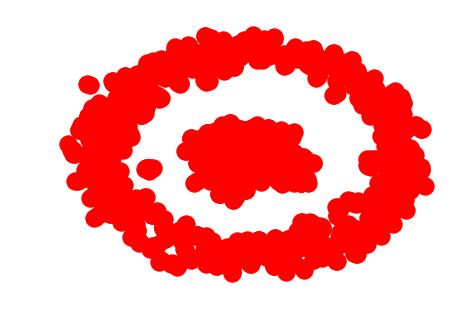

In [84]:
# Your code here.
nx.draw(G)

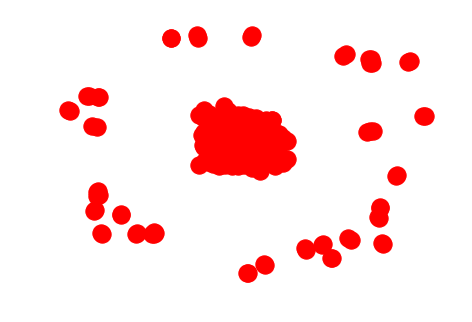

In [85]:
nx.draw(gc)

**Your answer here.**

2.5 Do you expect the properties studied in the first part of the assignment to be close to the original graph? Justify.

**Your answer here.**
